In [ ]:
!apt update
!apt install ffmpeg libsm6 libxext6 -y


Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://deb.debian.org/debian buster-updates InRelease
Hit:3 http://security.debian.org/debian-security buster/updates InRelease



1 package can be upgraded. Run 'apt list --upgradable' to see it.



ffmpeg is already the newest version (7:4.1.6-1~deb10u1).
libsm6 is already the newest version (2:1.2.3-1).
libxext6 is already the newest version (2:1.3.3-1+b2).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [1]:
import cv2
import darknet
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
# Initializing params
#confThreshold = 0.5
#nmsThreshold = 0.4
#inpWidth = 416
#inpHeight = 416

In [2]:
# Load name of classes
classesFile = "/work/darknet-master/data/coco.names"
classes = None
with open(classesFile, "rt") as f:
    classes = f.read().rstrip("\n").split("\n")

# Model configuration and weights
modelConfiguration = "/work/darknet-master/cfg/yolov3.cfg"
modelWeights = "/work/darknet-master/cfg/yolov3.weights"

# Loading the network
net = cv2.dnn.readNetFromDarknet(modelConfiguration, modelWeights)


In [3]:
layers_names = net.getLayerNames()
output_layers = [layers_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [ ]:
#colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [4]:
# Loading image
image = cv2.imread("/work/darknet-master/data/giraffe.jpg")
width, height, channels = image.shape

In [5]:
# Detecting object
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

# Setting input
net.setInput(blob) 
outs = net.forward(output_layers)

In [6]:
# Detecting image
class_ids = [] 
confidences = [] 
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores) 
        confidence = scores[class_id] 
        if confidence > 0.5:
            center_x = int(detection[0]* width) 
            center_y = int(detection[1]* height) 
            w = int(detection[2]* width) 
            h = int(detection[3]* height) 

            x = int(center_x - w/2) 
            y = int(center_y - h/2) 

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id) 


In [7]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i] 
        label = classes[class_ids[i]] 
        #color = colors[i] 

        cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, label, (x,y + 30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)

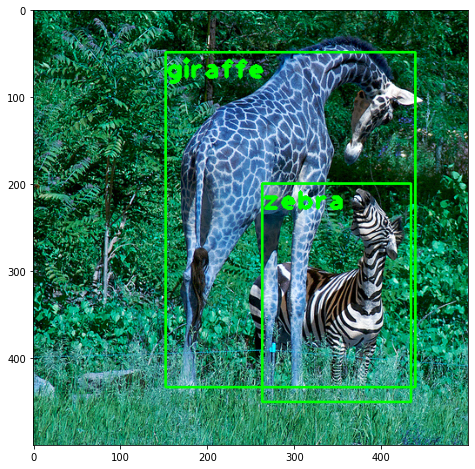

In [8]:
plt.figure(figsize=(10, 8))
plt.imshow(image);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3194c8c2-8e12-4458-843a-de418238306c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>